I.IMPORTATION des librairies

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scikitplot as skplt
from sklearn import metrics
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
#xlrd is a library for reading data and formatting information from Excel files in the historical .xls format.
import xlrd

II.CHARGEMENT d'un dataset

In [2]:


#en csv

df = pd.read_csv('voitures.csv')




IV.EXPLORATION

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Version       489 non-null    object 
 1   Prix          495 non-null    int64  
 2   Date          495 non-null    object 
 3   Km            493 non-null    float64
 4   Energie       493 non-null    object 
 5   Emission      387 non-null    float64
 6   Consommation  380 non-null    float64
 7   Boitier       495 non-null    object 
 8   Portes        494 non-null    object 
 9   Puissance     485 non-null    float64
 10  Places        491 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 42.7+ KB


Emission et consommation comportent beaucoup de valeurs nulles, il faudra peut-être les supprimer ou les remplacer.

In [4]:
df.shape

(495, 11)

In [5]:
df.head()

,Version,Prix,Date,Km,Energie,Emission,Consommation,Boitier,Portes,Puissance,Places
0,Tiguan 2.0 TDI 150 DSG7 4Motion Black R-Line,29500,Juillet 2019,24000.0,Diesel,133.0,NaN,Automatique,4 portes avec hayon,8.0,5.0
1,Laguna 1.9 DTI RTE,2000,Janvier 1999,320000.0,Diesel,NaN,5.5,Manuelle,4 portes avec hayon,6.0,5.0
2,2 CV 6 Special,12000,Mars 1986,96700.0,Essence,NaN,NaN,Manuelle,4 portes,3.0,5.0
3,Titanium 1.0 ecoboost mhev 125ch,22850,2021,10.0,NaN,NaN,NaN,Manuelle,4 portes avec hayon,6.0,NaN
4,Coccinelle Cabriolet 2.0 TDI 150 BMT Club,18100,Mars 2015,92600.0,Diesel,118.0,4.6,Manuelle,2 portes,8.0,4.0


In [6]:
# Afficher les cinq dernières lignes
df.tail()

,Version,Prix,Date,Km,Energie,Emission,Consommation,Boitier,Portes,Puissance,Places
490,3008 2.0 HDi 150ch FAP Allure,9500,Décembre 2013,134000.0,Diesel,139.0,5.3,Manuelle,4 portes avec hayon,8.0,5.0
491,25 TX Courchevel,5000,Octobre 1991,210310.0,Essence,NaN,NaN,Manuelle,4 portes avec hayon,9.0,5.0
492,Mini One 102 ch,16900,Août 2017,38000.0,Essence,109.0,4.7,Manuelle,2 portes avec hayon,5.0,4.0
493,Classe A 180 CDI BlueEFFICIENCY Inspiration,14700,Juin 2013,71400.0,Diesel,107.0,4.1,Manuelle,4 portes avec hayon,5.0,5.0
494,Arkana E-Tech 145 Business,29990,Septembre 2021,4000.0,Hybride,NaN,NaN,Automatique,4 portes avec hayon,5.0,5.0


<AxesSubplot:ylabel='None'>

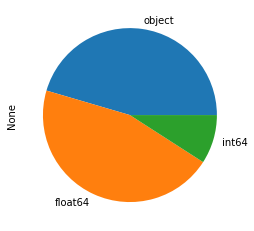

In [7]:
#Répartition des valeurs selon les types

df.dtypes.value_counts().plot.pie()

Nous avons beaucoup d'objets qu'il faudra encoder.

In [8]:
# La fonction .describe() nous donne une vision d'ensemble (statistiques) pour chaque colonne
df.describe()

,Prix,Km,Emission,Consommation,Puissance,Places
count,495.000000,493.000000,387.000000,380.000000,485.000000,491.000000
mean,12971.945455,109849.805274,139.653747,5.731579,7.626804,4.820774
std,10739.520771,83322.204624,45.779648,2.020803,4.935839,0.782758
min,1.000000,10.000000,32.000000,3.000000,3.000000,2.000000
25%,5099.500000,39000.000000,113.000000,4.500000,5.000000,5.000000
50%,10100.000000,98200.000000,128.000000,5.200000,6.000000,5.000000
75%,17845.000000,165400.000000,154.000000,6.300000,8.000000,5.000000
max,85000.000000,429000.000000,489.000000,21.000000,46.000000,9.000000


count: compte le nombre de valeurs non nulles dans le dataset. 
mean: valeur moyenne.
std: 'standard deviation', écart type, indicateur statistique mesurant la dispersion des valeurs d'un échantillon autour de la moyenne.
min: valeur minimum.
25%: premier quartile 1/4( ou centile 25%) représente 25% des valeurs de l'échantillon. 
50%: La médiane est la valeur centrale d'une série statistique dont les valeurs observées ont été ordonnées.
75%: troisième quartile 3/4 (ou centile 75%) représente 75% des valeurs de l'échantillon.
max: valeur maximum.

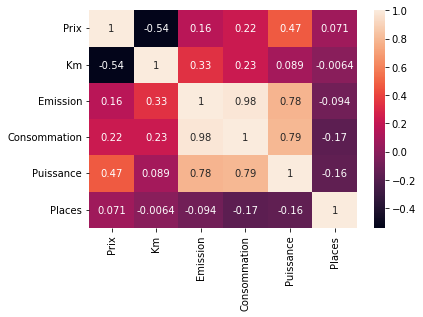

In [9]:
#Faire une matrice de corrélation et heatmap
##Pour lire la matrice on considère que les extrêmes -1 et 1 sont les plus proches d'une corrélation

from seaborn import heatmap
correlation_mat = df.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

Forte corrélation entre le prix et le nombre de km (prix baisse en fonction de l'augmentation des kilomètres).
L'emission de CO2 augmente en fonction de la consommation, ce qui parait logique.
La consommation augmente en fonction de la puissance.

On ne peut pas voir les corrélations avec les objets. Il faudrait standardiser et refaire la matrice.

V.TRAITEMENT des données manquantes

In [10]:
#Trouver valeurs manquantes, nulles ou qui pourraient poser problème
##Manquantes
df.isna().sum()

Version           6
Prix              0
Date              0
Km                2
Energie           2
Emission        108
Consommation    115
Boitier           0
Portes            1
Puissance        10
Places            4
dtype: int64

In [11]:
#J'enlève les colonnes que je ne vais pas utiliser car elles ont trop de valeurs manquantes et ce ne serait pas intéressant de les remplacer
#par une valeur moyenne ou médiane

df=df[['Prix','Date','Km','Energie','Portes','Puissance','Places']]

In [12]:
#Je supprime les valeurs manquantes
df=df.dropna()

In [13]:
df.isna().sum()


Prix         0
Date         0
Km           0
Energie      0
Portes       0
Puissance    0
Places       0
dtype: int64

In [14]:
df.head()

,Prix,Date,Km,Energie,Portes,Puissance,Places
0,29500,Juillet 2019,24000.0,Diesel,4 portes avec hayon,8.0,5.0
1,2000,Janvier 1999,320000.0,Diesel,4 portes avec hayon,6.0,5.0
2,12000,Mars 1986,96700.0,Essence,4 portes,3.0,5.0
4,18100,Mars 2015,92600.0,Diesel,2 portes,8.0,4.0
5,4000,Avril 2008,173300.0,Diesel,4 portes avec hayon,8.0,5.0


In [15]:
df.shape

(482, 7)

En supprimant les valeurs nulles j'ai perdu 15 lignes, ce qui n'impacte pas beaucoup mon jeu de données.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 494
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Prix       482 non-null    int64  
 1   Date       482 non-null    object 
 2   Km         482 non-null    float64
 3   Energie    482 non-null    object 
 4   Portes     482 non-null    object 
 5   Puissance  482 non-null    float64
 6   Places     482 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 30.1+ KB


J'ai bien mes colonnes en moins mais j'ai toujours besoin de transformer mes object en float pour ensuite standardiser.

Date: je dois garder seulement l'année et non pas le mois.
Energie: encoder
Portes: garder le chiffre et transformer en int

In [17]:
#Transformation du prix en float
df.Prix = df.Prix.astype('int64')

In [18]:
#Récupération de l'année dans Date donc transformation d'object en string
df.Date = df.Date.astype('string')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 494
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Prix       482 non-null    int64  
 1   Date       482 non-null    string 
 2   Km         482 non-null    float64
 3   Energie    482 non-null    object 
 4   Portes     482 non-null    object 
 5   Puissance  482 non-null    float64
 6   Places     482 non-null    float64
dtypes: float64(3), int64(1), object(2), string(1)
memory usage: 30.1+ KB


In [20]:
df.Date

0        Juillet 2019
1        Janvier 1999
2           Mars 1986
4           Mars 2015
5          Avril 2008
            ...      
490     Décembre 2013
491      Octobre 1991
492         Août 2017
493         Juin 2013
494    Septembre 2021
Name: Date, Length: 482, dtype: string

In [21]:
df.Date=df.Date.str[-4:]

In [22]:
df.head(20)

,Prix,Date,Km,Energie,Portes,Puissance,Places
0,29500,2019,24000.0,Diesel,4 portes avec hayon,8.0,5.0
1,2000,1999,320000.0,Diesel,4 portes avec hayon,6.0,5.0
2,12000,1986,96700.0,Essence,4 portes,3.0,5.0
4,18100,2015,92600.0,Diesel,2 portes,8.0,4.0
5,4000,2008,173300.0,Diesel,4 portes avec hayon,8.0,5.0
6,6800,2008,212500.0,Diesel,4 portes,9.0,5.0
7,3800,2009,115000.0,Diesel,4 portes avec hayon,4.0,5.0
8,19800,2021,2800.0,Essence,4 portes avec hayon,6.0,5.0
9,2450,2009,209200.0,Diesel,2 portes avec hayon,4.0,4.0
11,10500,2000,149000.0,Essence,2 portes avec hayon,11.0,4.0


In [23]:
df.Date = df.Date.astype('int64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 494
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Prix       482 non-null    int64  
 1   Date       482 non-null    int64  
 2   Km         482 non-null    float64
 3   Energie    482 non-null    object 
 4   Portes     482 non-null    object 
 5   Puissance  482 non-null    float64
 6   Places     482 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 30.1+ KB


In [25]:
#Je veux garder seulement le nombre de portes dans Portes et le transformer en integer
#Je dois d'abord le transformer en string

df.Portes = df.Portes.astype('string')


In [26]:
df.Portes=df.Portes.str[0:1]

In [27]:
df.Portes

0      4
1      4
2      4
4      2
5      4
      ..
490    4
491    4
492    2
493    4
494    4
Name: Portes, Length: 482, dtype: string

In [28]:
#Je retransforme Portes en int

df.Portes = df.Portes.astype('int64')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 494
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Prix       482 non-null    int64  
 1   Date       482 non-null    int64  
 2   Km         482 non-null    float64
 3   Energie    482 non-null    object 
 4   Portes     482 non-null    int64  
 5   Puissance  482 non-null    float64
 6   Places     482 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 30.1+ KB


VI.ENCODAGE des variables catégoriques

In [30]:
#Je dois encoder Energie
#Je vais d'abord vérifier combien de valeurs distinctes cette colonne comporte

df['Energie'].value_counts(normalize=True)

Diesel        0.520747
Essence       0.443983
Hybride       0.024896
Autres        0.006224
GPL ou GNL    0.004149
Name: Energie, dtype: float64

In [31]:
#Je choisis labelencoder car j'ai plus de deux valeurs

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label = preprocessing.LabelEncoder() 
 
df['Energie']= label.fit_transform(df['Energie']) 

In [32]:
df.head()

,Prix,Date,Km,Energie,Portes,Puissance,Places
0,29500,2019,24000.0,1,4,8.0,5.0
1,2000,1999,320000.0,1,4,6.0,5.0
2,12000,1986,96700.0,2,4,3.0,5.0
4,18100,2015,92600.0,1,2,8.0,4.0
5,4000,2008,173300.0,1,4,8.0,5.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 494
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Prix       482 non-null    int64  
 1   Date       482 non-null    int64  
 2   Km         482 non-null    float64
 3   Energie    482 non-null    int32  
 4   Portes     482 non-null    int64  
 5   Puissance  482 non-null    float64
 6   Places     482 non-null    float64
dtypes: float64(3), int32(1), int64(3)
memory usage: 28.2 KB


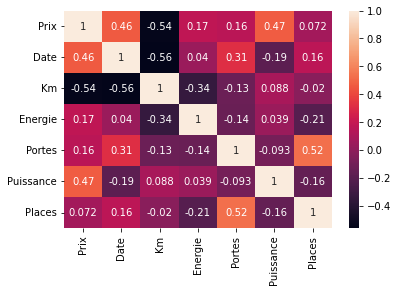

In [34]:
from seaborn import heatmap
correlation_mat = df.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

IX.VISUALISATION DES DONNEES (et non pas du modèle)

No handles with labels found to put in legend.


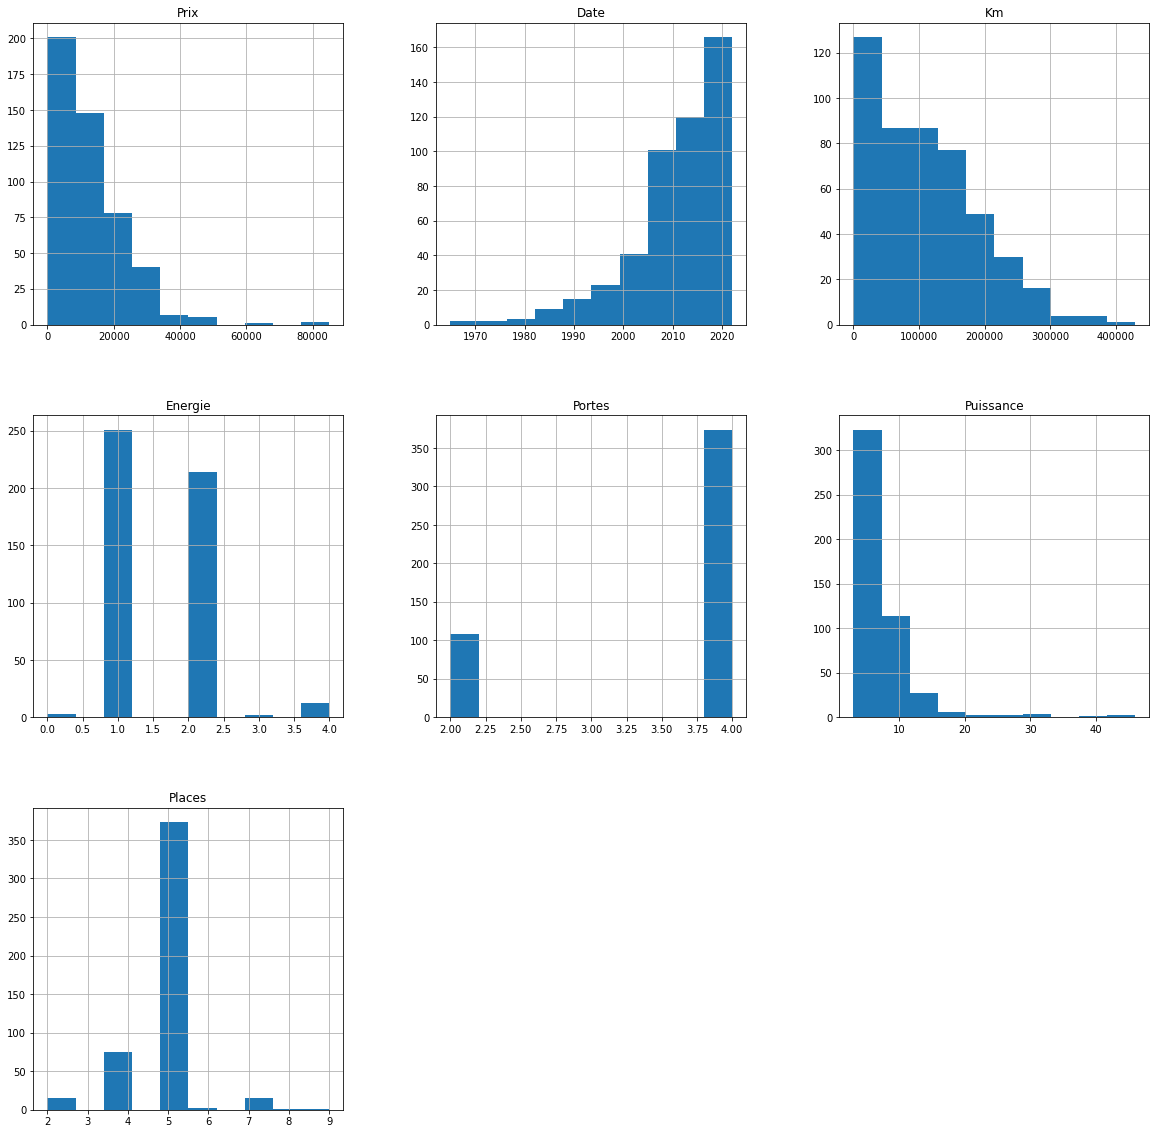

In [35]:
#tous les histo d'un coup
df.hist(figsize=(20,20))
plt.legend()
plt.show()

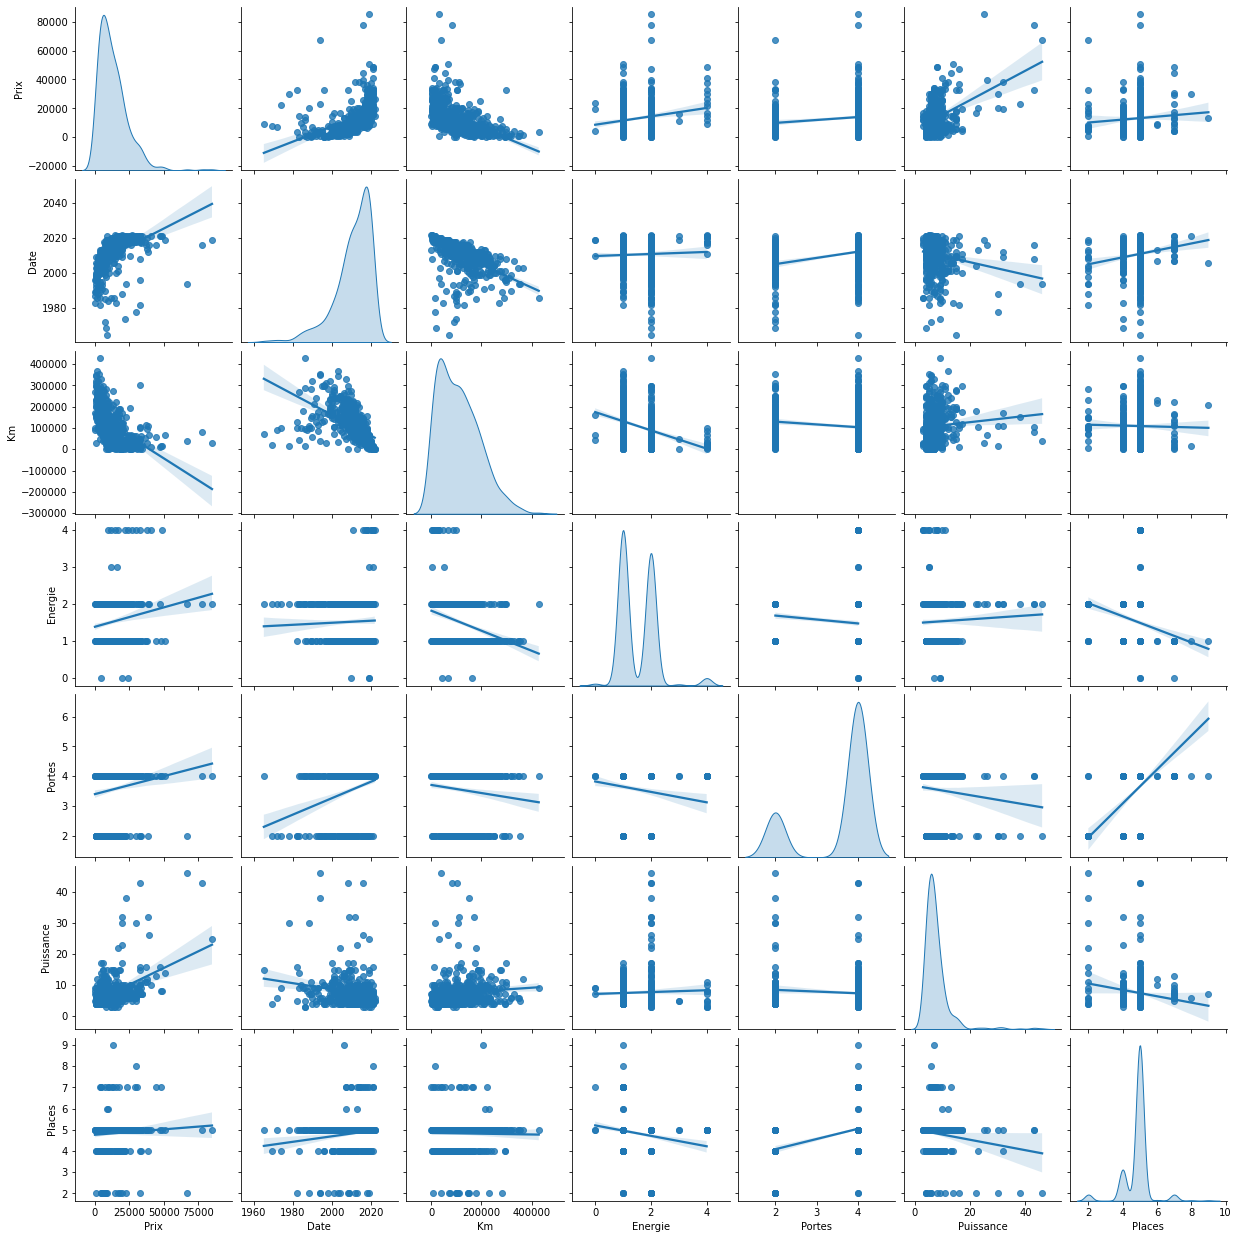

In [36]:
#ou Nous utilisons ici un pairplot pour avoir une première idée des relations possibles entre les données et
# leurs distributions

sns.pairplot(df, kind='reg', diag_kind='kde')

In [37]:
#Je décide de garder seulement les features date, km et puissance
df=df[['Prix','Date','Km','Puissance']]

X.DEFINIR ses variables

In [38]:
#dépendantes/indépendantes

#iloc permet de localiser sans pour autant effacer comme avec un drop et le -1 à la fin enlève la dernière colonne qui est celle de target pour la régression logistique.
X=df.iloc[:,1:]
y=df.iloc[:,0]



XI.ENTRAINEMENT

In [39]:
#SPLIT le dataset en données de TRAINING et de TESTING. Nous allons d'abord utiliser celles de training.
# importer la méthode train_test_split 
#le paramètre stratify permet d'obtenir un échantillon représentatif quand une classe a plus de poids qu'une autre
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

Pour la technique de la backward elimination et des moindres carrés http://localhost:8888/notebooks/Desktop/BRIEFS%20Simplonline/Brief%208%20Licorne/correction_licorne_regression_lineaire.ipynb

In [40]:
#vérification des dimensions
y_train.shape , y_test.shape

((337,), (145,))

In [41]:
#Technique de cross_validation
##Choisir dans le random state le même nombre que lors du split
from sklearn.model_selection import KFold
cv_sets = KFold(n_splits=10, shuffle=True, random_state=42)

XII.CREATION du modèle

>ARBRE DE DECISION REGRESSION

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=42)

XIII.ENTRAINEMENT

In [43]:
#remplacer "classifier" par le nom de notre modèle
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

Gridsearch

In [44]:
#Optimisation du paramètre max_depth
# Pour trouver la valeur du paramètre max_depth qui donne le meilleur estimateur (meilleur arbre de régression), on utilise la classe GridSearchCV
params = dict(max_depth=range(1,10))
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(dtr, params, cv=cv_sets, scoring='accuracy')
grid_cv.fit(X_train,y_train)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(1, 10)}, scoring='accuracy')

In [45]:
#stocker le meilleur modèle grace à l'attribut best estimator
best_tree = grid_cv.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=1, random_state=42)

In [46]:
#profondeur maximale (*max_depth*) du modèle optimal (best_tree) 
best_params = grid_cv.best_params_
best_params
y_pred=best_tree.predict(X_test)

XIV.PREDICTION

In [48]:
df.head()

,Prix,Date,Km,Puissance
0,29500,2019,24000.0,8.0
1,2000,1999,320000.0,6.0
2,12000,1986,96700.0,3.0
4,18100,2015,92600.0,8.0
5,4000,2008,173300.0,8.0


In [49]:
#tester ma prédiction

dtr.predict([[2019,24000,8.0]])

array([29500.])

XV.VISUALISATION du modèle

>ARBRE DE DECISION

[Text(208.20010179422673, 211.7178947368421, 'X[0] <= 2015.5\nmse = 104976782.222\nsamples = 337\nvalue = 13139.89'),
 Text(146.9335656117585, 200.2736842105263, 'X[2] <= 15.5\nmse = 60368500.924\nsamples = 206\nvalue = 8250.888'),
 Text(102.82306342690678, 188.82947368421054, 'X[0] <= 2009.5\nmse = 28414142.727\nsamples = 197\nvalue = 7201.487'),
 Text(49.610056938559325, 177.38526315789474, 'X[2] <= 9.5\nmse = 14366846.046\nsamples = 111\nvalue = 4600.91'),
 Text(11.323291843220339, 165.94105263157894, 'X[0] <= 1978.0\nmse = 10990582.241\nsamples = 90\nvalue = 3780.678'),
 Text(3.1623940677966105, 154.49684210526317, 'X[1] <= 95000.0\nmse = 46888888.889\nsamples = 3\nvalue = 12333.333'),
 Text(2.2166313559322037, 143.05263157894737, 'X[2] <= 5.0\nmse = 250000.0\nsamples = 2\nvalue = 7500.0'),
 Text(1.2708686440677968, 131.60842105263157, 'mse = 0.0\nsamples = 1\nvalue = 8000.0'),
 Text(3.1623940677966105, 131.60842105263157, 'mse = 0.0\nsamples = 1\nvalue = 7000.0'),
 Text(4.10815677

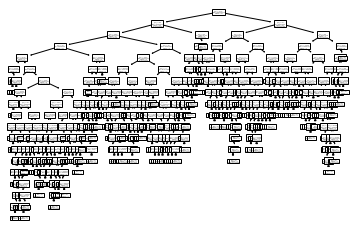

In [50]:
from sklearn import tree
tree.plot_tree(dtr)

Overfitting

In [51]:
# créer le modèle d'arbre de décision 
# avec le paramètre max_depth = 3
# le but est de ne pas laisser l'arbre se développer et sur-apprendre 
classifier = DecisionTreeRegressor(max_depth=2)
# notre modèle est stocké dans la variable classifier (l'ancier classifier est donc écrasé)

# entraîner le classifier de nouveau
classifier.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [52]:
classifier.predict([[2019,24000,8.0]])

array([26854.40677966])

XVI.EVALUATION

Courbe d'apprentissage

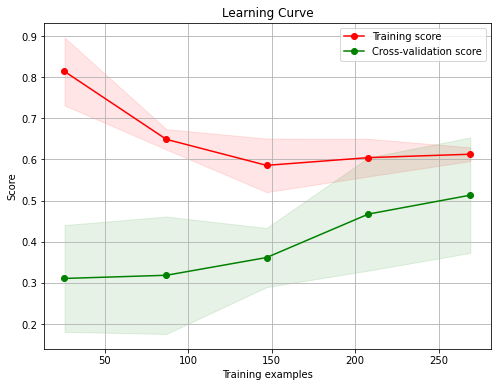

In [54]:
skplt.estimators.plot_learning_curve(classifier, X_train, y_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

In [55]:
# Quelques paramètres pour vérifier correctement notre modèle 

print('Erreur absolue moyenne:', metrics.mean_absolute_error(y_test, y_pred))  
print('Erreur quadratique moyenne:', metrics.mean_squared_error(y_test, y_pred))  
print('Erreur quadratique moyenne au carré:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Erreur absolue moyenne: 5935.471405351946
Erreur quadratique moyenne: 95857830.70100005
Erreur quadratique moyenne au carré: 9790.701236428371


XVII.Sauvegarder mon modèle en fichier

In [58]:
##Avec Python et Pickle

import pickle
with open('model_pickle','wb') as file:
    pickle.dump(classifier,file)
#Load Saved Model
with open('model_pickle','rb') as file:
    mp = pickle.load(file)
